# Notes

**handles: sequence of Artist, optional - A list of Artists (lines, patches) to be added to the legend.**

**labels: list of str, optional - A list of labels to show next to the artists. Use this together with handles.**

source: matplotlib documentation

# imports

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from vega_datasets import data as vds
pd.set_option('display.max_rows', 1000)

# legend with sizes

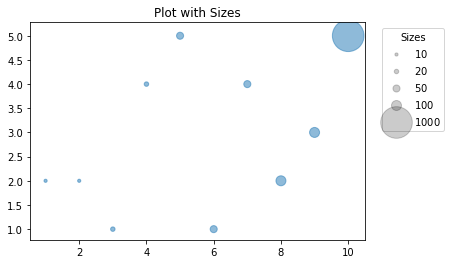

In [120]:
# matplotlib

# data
x = [1,2,3,4,5,6,7,8,9,10]
y = [2,2,1,4,5,1,4,2,3,5]
size = [10,10,20,20,50,50,50,100,100,1000]

# plot
scatter = plt.scatter(x, y, s=size, alpha=0.5)
plt.title('Plot with Sizes')

# legend
# legend_elements() creates legend handles and labels
# change num argument to alter legend
handles, labels = scatter.legend_elements(prop='sizes', alpha=0.2)
plt.legend(handles, labels, loc=(1.05,0.5), title='Sizes');

# plt.legend(*sc.legend_elements('sizes'), loc=(1.05,0))

In [122]:
url = 'https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population'
cities_pop = pd.read_html(url)[4]
cities_pop.head()

,2019rank,City,State[c],2019estimate,2010Census,Change,2016 land area,2016 land area.1,2016 population density,2016 population density.1,Location
0,1,New York[d],New York,8336817,8175133,+1.98%,301.5 sq mi,780.9 km2,"28,317/sq mi","10,933/km2",40°39′49″N 73°56′19″W﻿ / ﻿40.6635°N 73.9387°W
1,2,Los Angeles,California,3979576,3792621,+4.93%,468.7 sq mi,"1,213.9 km2","8,484/sq mi","3,276/km2",34°01′10″N 118°24′39″W﻿ / ﻿34.0194°N 118.4108°W
2,3,Chicago,Illinois,2693976,2695598,−0.06%,227.3 sq mi,588.7 km2,"11,900/sq mi","4,600/km2",41°50′15″N 87°40′54″W﻿ / ﻿41.8376°N 87.6818°W
3,4,Houston[3],Texas,2320268,2100263,+10.48%,637.5 sq mi,"1,651.1 km2","3,613/sq mi","1,395/km2",29°47′12″N 95°23′27″W﻿ / ﻿29.7866°N 95.3909°W
4,5,Phoenix,Arizona,1680992,1445632,+16.28%,517.6 sq mi,"1,340.6 km2","3,120/sq mi","1,200/km2",33°34′20″N 112°05′24″W﻿ / ﻿33.5722°N 112.0901°W


In [123]:
# data
cities = ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'Philadelphia', 'San Antonio', 'San Diego', 'Dallas', 'San Jose']
pop_2018 = [8398748, 3990456, 2705994, 2325502, 1660272, 1584138, 1532233, 1425976, 1345047, 1030119]
longitudes = [-73.9387, -118.4108, -87.6818, -95.3909, -112.0901, -75.1333, -98.5251, -117.1350, -96.7665, -121.8189]
latitudes = [40.6635, 34.0194, 41.8376, 29.7866, 33.5722, 40.0094, 29.4724, 32.8153, 32.7933, 37.2967]

df = pd.DataFrame({'cities': cities,
                   'pop_2018': pop_2018,
                   'longitudes': longitudes,
                   'latitudes': latitudes})

# ***** the legend_elements fmt argument can also be use to format labels *****
df['scaled_pop'] = round(df['pop_2018']/1_000_000, 1).astype(str) + ' M'
df['labels'] = df['scaled_pop'] + ' - ' + df['cities']

df

,cities,pop_2018,longitudes,latitudes,scaled_pop,labels
0,New York,8398748,-73.9387,40.6635,8.4 M,8.4 M - New York
1,Los Angeles,3990456,-118.4108,34.0194,4.0 M,4.0 M - Los Angeles
2,Chicago,2705994,-87.6818,41.8376,2.7 M,2.7 M - Chicago
3,Houston,2325502,-95.3909,29.7866,2.3 M,2.3 M - Houston
4,Phoenix,1660272,-112.0901,33.5722,1.7 M,1.7 M - Phoenix
5,Philadelphia,1584138,-75.1333,40.0094,1.6 M,1.6 M - Philadelphia
6,San Antonio,1532233,-98.5251,29.4724,1.5 M,1.5 M - San Antonio
7,San Diego,1425976,-117.1350,32.8153,1.4 M,1.4 M - San Diego
8,Dallas,1345047,-96.7665,32.7933,1.3 M,1.3 M - Dallas
9,San Jose,1030119,-121.8189,37.2967,1.0 M,1.0 M - San Jose


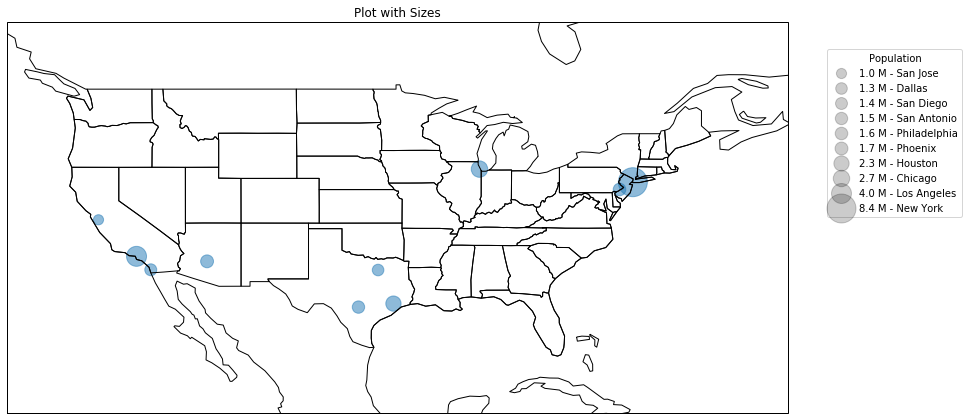

In [124]:
# cartopy

# map
fig = plt.figure(figsize=(14, 14))
m = plt.axes(projection=ccrs.PlateCarree())
# (x0, x1, y0, y1)
m.set_extent([-130, -60, 20, 55], ccrs.PlateCarree())         
m.add_feature(cfeature.STATES)
m.coastlines()

# scatter plot
scatter = m.scatter(df.longitudes, 
                    df.latitudes, 
                    s=df.pop_2018/10000,
                    alpha=0.5,
                    transform=ccrs.PlateCarree(),
                    label='Cities')

plt.title('Plot with Sizes')

# legend
labels = reversed(list(df.labels))
# num argument - if None, use all unique elements of the mappable array
handles, _ = scatter.legend_elements(prop='sizes', num=None, alpha=0.2)
# change loc to move legend using (x,y)
m.legend(handles, labels, loc=(1.05,0.5), title='Population');

# legend with colors and labels

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']


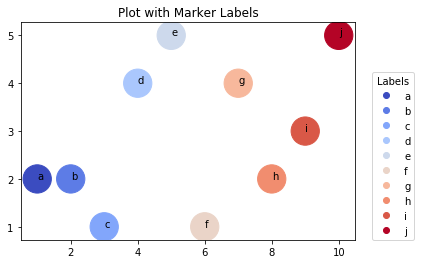

In [125]:
# matplotlib

# data
x = [1,2,3,4,5,6,7,8,9,10]
y = [2,2,1,4,5,1,4,2,3,5]
labels = list('abcdefghij')
print(labels)

# plot
scatter = plt.scatter(x, y, s=800, c=range(len(labels)), cmap='coolwarm')
plt.title('Plot with Marker Labels')

# legend
handles, _ = scatter.legend_elements(prop='colors')
plt.legend(handles, labels, loc=(1.05,0), title='Labels');

# label each point
for i, label in enumerate(labels):
    plt.text(x=x[i], y=y[i], s=label)

In [126]:
airports = vds.airports()
airports = airports[:10]
airports['value'] = [100,200,300,400,500,600,700,800,900,1000]
# another way to concatenate columns (like +)
airports['legend_labels'] = airports.name.str.cat(airports.value.astype(str), sep=' - ')
airports.head()

,iata,name,city,state,country,latitude,longitude,value,legend_labels
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505,100,Thigpen - 100
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928,200,Livingston Municipal - 200
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893,300,Meadow Lake - 300
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081,400,Perry-Warsaw - 400
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944,500,Hilliard Airpark - 500


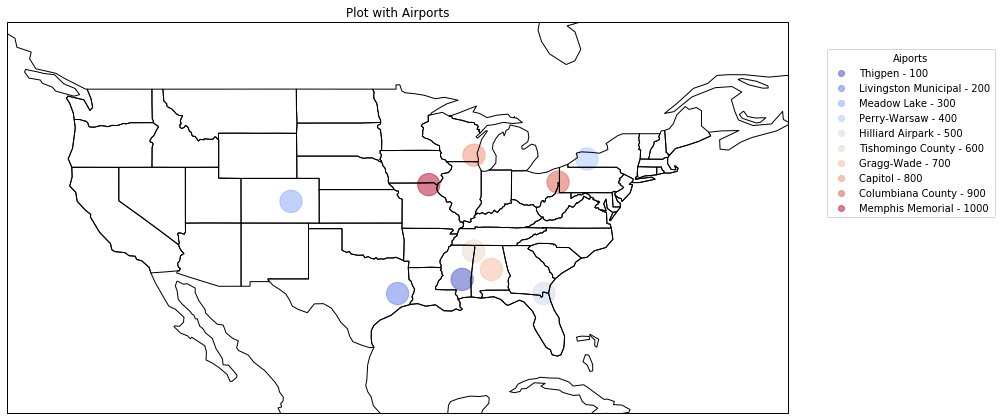

In [127]:
# cartopy
# colors correspond with values
# values here are arbitrary but could be something like number of flights or passengers

# map
fig = plt.figure(figsize=(14, 14))
m = plt.axes(projection=ccrs.PlateCarree())
# (x0, x1, y0, y1)
m.set_extent([-130, -60, 20, 55], ccrs.PlateCarree())         
m.add_feature(cfeature.STATES)
m.coastlines()

# scatter plot
labels = list(airports.legend_labels)
scatter = m.scatter(airports.longitude, 
                    airports.latitude,
                    alpha=0.5,
                    c=range(len(labels)), 
                    cmap='coolwarm',
                    s=500,
                    transform=ccrs.PlateCarree(),
                    label='Airports')

plt.title('Plot with Airports')

# legend
handles, _ = scatter.legend_elements(prop='colors', alpha=0.5)
m.legend(handles, labels, loc=(1.05,0.5), title='Aiports');

# legend with colorbar

In [134]:
cars = vds.cars()
cars = cars[['Miles_per_Gallon', 'Cylinders', 'Displacement', 'Horsepower', 'Weight_in_lbs', 'Acceleration']]
cars.head()

,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration
0,18.0,8,307.0,130.0,3504,12.0
1,15.0,8,350.0,165.0,3693,11.5
2,18.0,8,318.0,150.0,3436,11.0
3,16.0,8,304.0,150.0,3433,12.0
4,17.0,8,302.0,140.0,3449,10.5


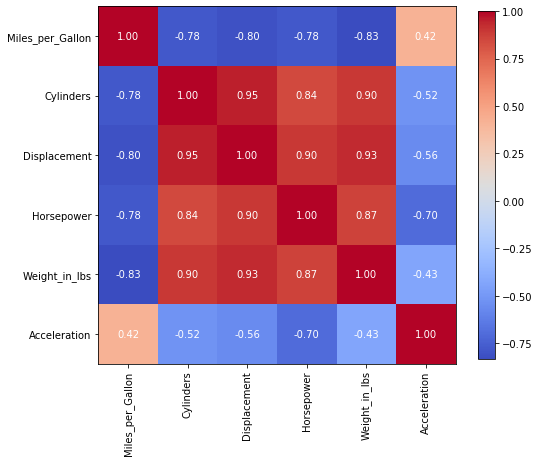

In [129]:
# matplotlib
plt.imshow(cars.corr(), cmap='coolwarm', interpolation='none')
plt.colorbar(shrink=0.8)
plt.xticks(range(len(cars.columns)), cars.columns, rotation=90)
plt.yticks(range(len(cars.columns)), cars.columns)
plt.gcf().set_size_inches(8,8)
plt.axis('scaled')

labels = cars.corr().values
for y in range(labels.shape[0]):
    for x in range(labels.shape[1]):
        plt.text(x, y, '{:.2f}'.format(labels[y, x]), ha='center', va='center', color='white')

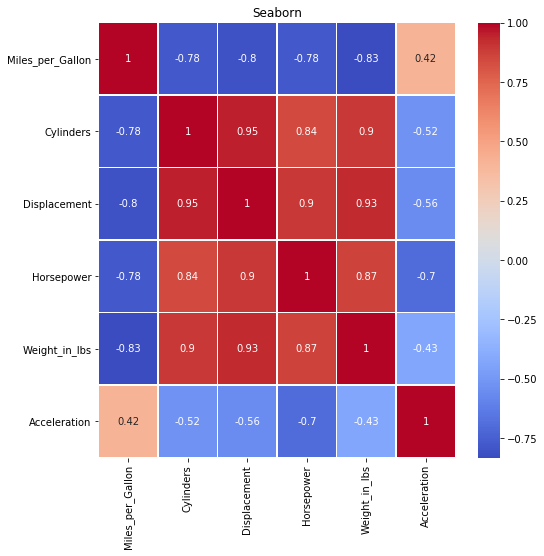

In [130]:
import seaborn as sns
plt.figure(figsize=(8,8))
sns.heatmap(cars.corr(), annot=True, cmap='coolwarm', linewidths=0.5).set_title('Seaborn');

In [131]:
# data from kaggle
earthquakes = pd.read_csv('earthquakes_data.csv')
earthquakes.tail()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed
23411,12/30/2016,20:08:28,37.3973,141.4103,Earthquake,11.94,2.2,NaN,5.5,MB,...,428.0,97.00,0.681,4.5,0.9100,US10007NTD,US,US,US,Reviewed


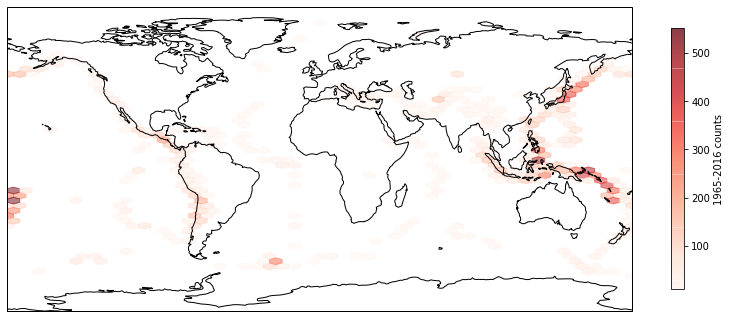

In [132]:
# cartopy
# hexbin map with earthquakes
fig = plt.figure(figsize=(14,12))
m = fig.add_subplot(projection=ccrs.PlateCarree())
m.coastlines()
# [xmin, xmax, ymin, ymax]
# m.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())

hb = m.hexbin(earthquakes.Longitude, 
              earthquakes.Latitude, 
              gridsize=50, 
              cmap='Reds',
              mincnt=10,
              alpha=0.5)


cb = fig.colorbar(hb, ax=m, shrink=0.4)
cb.set_label('1965-2016 counts')

# legend with mpatches

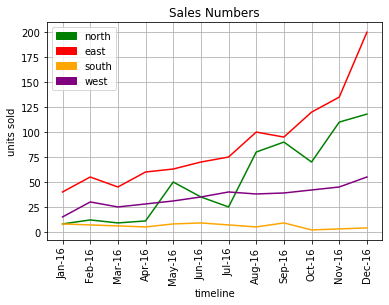

In [133]:
# data (x=timeline, y=sales region numbers)
x_labels = ['Jan-16','Feb-16','Mar-16','Apr-16','May-16','Jun-16','Jul-16','Aug-16','Sep-16','Oct-16',
            'Nov-16','Dec-16']
y_units_sold_north = [8,12,9,11,50,35,25,80,90,70,110,118]
y_units_sold_east = [40,55,45,60,63,70,75,100,95,120,135,200] 
y_units_sold_south = [8,7,6,5,8,9,7,5,9,2,3,4]
y_units_sold_west = [15,30,25,28,31,35,40,38,39,42,45,55]

# plot lines and give each line a unique color
plt.plot(y_units_sold_north, color='green')
plt.plot(y_units_sold_east, color='red')
plt.plot(y_units_sold_south, color='orange')
plt.plot(y_units_sold_west, color='purple')

# labels
plt.title('Sales Numbers')
plt.xlabel('timeline')
plt.ylabel('units sold')
plt.xticks(np.arange(len(x_labels)), x_labels, rotation=90)

# legend
green_patch = mpatches.Patch(color='green', label='north')
red_patch = mpatches.Patch(color='red', label='east')
orange_patch = mpatches.Patch(color='orange', label='south')
purple_patch = mpatches.Patch(color='purple', label='west')
plt.legend(handles=[green_patch, red_patch, orange_patch, purple_patch])

# add grid
plt.grid(True)